In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize' : (12, 5)}, font='verdana')
plt.style.use('dark_background')

In [120]:
df = pd.read_excel('commercial_data_generated_xls.xlsx')
df

,datetime,order_id,customer_id,item,price,quantity,discount,bundle_discount
0,2024-11-03 12:19:45,2782292,0,item_36,716.0,2,0.0,0.0
1,2024-11-03 12:19:45,2782292,0,item_98,240.2,7,0.0,0.0
2,2024-11-03 12:19:45,2782292,0,item_96,260.3,8,0.0,0.0
3,2024-11-03 12:19:45,2782292,0,item_11,441.2,5,0.0,0.0
4,2024-11-03 12:19:45,2782292,0,item_13,297.3,1,0.0,0.0
...,...,...,...,...,...,...,...,...
17272,2024-11-29 20:27:58,2782873,76186,item_74,744.8,9,0.2,0.0
17273,2024-06-13 19:02:28,2779007,69449,item_60,428.2,5,0.2,0.0
17274,2024-06-13 17:00:26,2779010,0,item_63,680.9,8,0.0,0.0
17275,2024-06-13 16:37:15,2779011,30416,item_45,93.4,6,0.2,0.0


In [121]:
df.item.value_counts().sort_values().tail(1)

item
item_96    336
Name: count, dtype: int64

In [122]:
df['date'] = df.datetime.dt.date

In [123]:
df[df.item == 'item_96']

,datetime,order_id,customer_id,item,price,quantity,discount,bundle_discount,date
2,2024-11-03 12:19:45,2782292,0,item_96,260.3,8,0.0,0.0,2024-11-03
93,2024-11-16 16:29:24,2782613,0,item_96,260.3,5,0.0,0.0,2024-11-16
126,2024-11-17 14:58:23,2782620,0,item_96,260.3,5,0.0,0.0,2024-11-17
165,2024-09-15 16:30:36,2781137,0,item_96,260.3,3,0.0,0.0,2024-09-15
178,2024-11-29 08:51:31,2782877,0,item_96,260.3,6,0.0,0.0,2024-11-29
...,...,...,...,...,...,...,...,...,...
17120,2024-10-01 19:48:34,2781514,51837,item_96,260.3,2,0.2,0.0,2024-10-01
17181,2024-05-06 18:10:06,2778182,0,item_96,260.3,3,0.0,0.0,2024-05-06
17199,2024-09-02 18:50:26,2780900,0,item_96,260.3,8,0.0,0.0,2024-09-02
17211,2024-09-05 13:07:35,2780947,0,item_96,260.3,8,0.0,0.0,2024-09-05


In [124]:
t = df[df.item == 'item_96'].groupby('date', as_index = False).agg(sales = ('quantity','sum'), orders = ('quantity','count'), ord_cnt=('quantity','mean'))
t

,date,sales,orders,ord_cnt
0,2024-05-01,15,3,5.000000
1,2024-05-02,15,3,5.000000
2,2024-05-03,11,2,5.500000
3,2024-05-04,17,2,8.500000
4,2024-05-05,11,2,5.500000
...,...,...,...,...
162,2024-12-23,8,1,8.000000
163,2024-12-24,9,1,9.000000
164,2024-12-27,14,3,4.666667
165,2024-12-28,9,2,4.500000


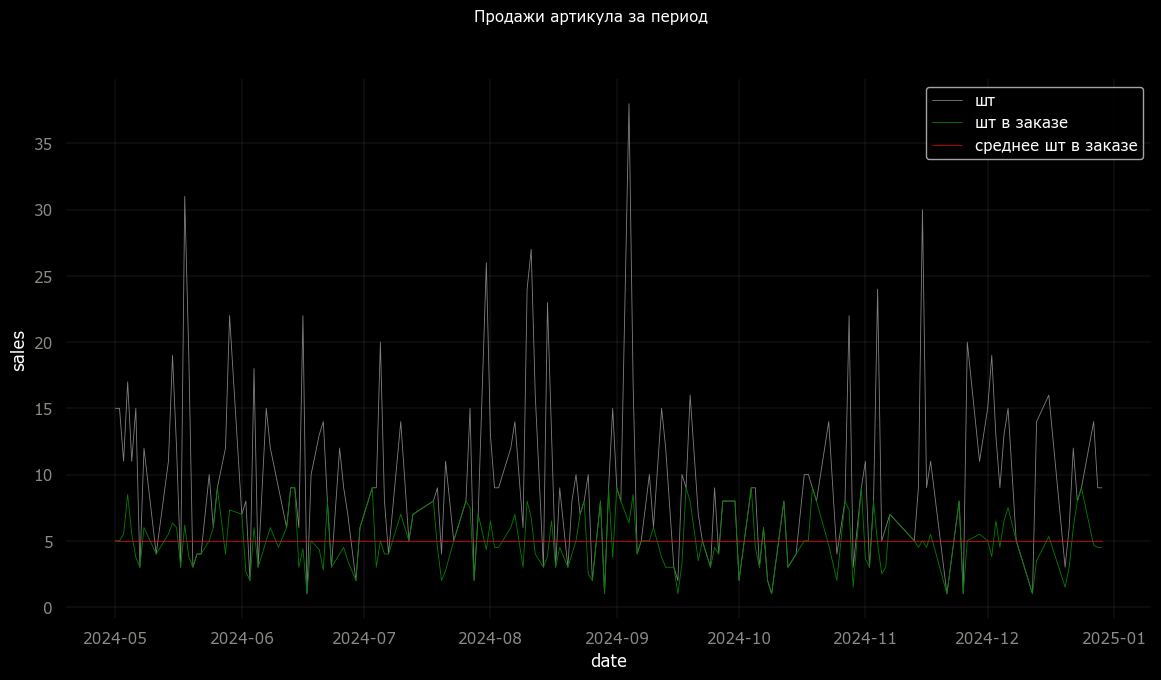

In [125]:
plt.figure(figsize=(14,7))

plt.suptitle('Продажи артикула за период', fontsize=11)
sns.lineplot(x = t.date, y = t.sales, color = 'gray', linewidth=0.6, label = 'шт')
sns.lineplot(x = t.date, y = t.ord_cnt, color = 'green', linewidth=0.6, label = 'шт в заказе')
sns.lineplot(x = t.date, y = np.array([t.ord_cnt.mean()]*167), linewidth=0.5, color = 'red', label = 'среднее шт в заказе')

plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

In [234]:
df_test = df[df.item == 'item_96'].sort_values('date').reset_index()
df_test['stock'] = 0

In [235]:
prev = 500
for index, row in df_test.iterrows():
    if prev >=0:
        df_test.at[index,'stock'] = prev - row['quantity']
        prev = df_test.at[index, 'stock']
df_test

,index,datetime,order_id,customer_id,item,price,quantity,discount,bundle_discount,date,stock
0,2024,2024-05-01 10:18:20,2778038,0,item_96,260.3,6,0.0,0.0,2024-05-01,494
1,13123,2024-05-01 15:17:44,2778030,39398,item_96,260.3,2,0.2,0.0,2024-05-01,492
2,13194,2024-05-01 19:51:33,2778045,43924,item_96,260.3,7,0.2,0.0,2024-05-01,485
3,8697,2024-05-02 22:55:15,2778079,0,item_96,260.3,2,0.0,0.0,2024-05-02,483
4,13199,2024-05-02 22:03:12,2778084,0,item_96,260.3,4,0.0,0.0,2024-05-02,479
...,...,...,...,...,...,...,...,...,...,...,...
331,13214,2024-12-27 19:10:57,2783511,82769,item_96,260.3,2,0.2,0.0,2024-12-27,0
332,13042,2024-12-28 10:34:01,2783522,0,item_96,260.3,8,0.0,0.0,2024-12-28,0
333,16555,2024-12-28 19:28:43,2783517,0,item_96,260.3,1,0.0,0.0,2024-12-28,0
334,16634,2024-12-29 20:23:25,2783537,86111,item_96,260.3,7,0.2,0.0,2024-12-29,0


In [236]:
df_test['roll'] = df_test.quantity.rolling(window=14).sum()
df_test[14:25]

,index,datetime,order_id,customer_id,item,price,quantity,discount,bundle_discount,date,stock,roll
14,12230,2024-05-06 18:57:06,2778194,87466,item_96,260.3,3,0.2,0.0,2024-05-06,419,75.0
15,17181,2024-05-06 18:10:06,2778182,0,item_96,260.3,3,0.0,0.0,2024-05-06,416,76.0
16,12244,2024-05-07 13:06:54,2778199,0,item_96,260.3,3,0.0,0.0,2024-05-07,413,72.0
17,12416,2024-05-08 11:19:34,2778212,74629,item_96,260.3,8,0.2,0.0,2024-05-08,405,78.0
18,13705,2024-05-08 10:16:59,2778213,0,item_96,260.3,4,0.0,0.0,2024-05-08,401,78.0
19,13830,2024-05-11 10:58:07,2778286,0,item_96,260.3,4,0.0,0.0,2024-05-11,397,73.0
20,11170,2024-05-14 21:08:50,2778330,0,item_96,260.3,5,0.0,0.0,2024-05-14,392,69.0
21,13862,2024-05-14 10:46:06,2778327,0,item_96,260.3,6,0.0,0.0,2024-05-14,386,73.0
22,7127,2024-05-15 18:36:23,2778379,50915,item_96,260.3,7,0.2,0.5,2024-05-15,379,71.0
23,14117,2024-05-15 19:43:34,2778380,0,item_96,260.3,9,0.0,0.0,2024-05-15,370,72.0


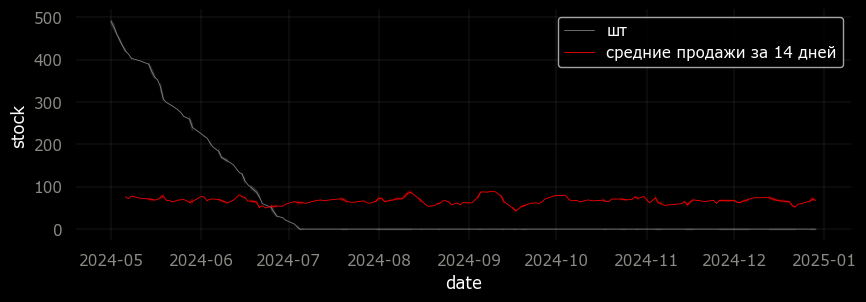

In [237]:
plt.figure(figsize=(10,3))
sns.lineplot(x = df_test.date, y = df_test.stock, color = 'gray', linewidth=0.6, label = 'шт')
sns.lineplot(x = df_test.date, y = df_test.roll, color = 'red', linewidth=0.6, label = 'средние продажи за 14 дней')
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

In [272]:
df_t = df_test.copy()

In [273]:
x=4
cnt=0
for index, row in df_t.iterrows():
    if index > 14:
        if x*df_t.at[index,'roll']  > df_t.at[index,'stock']:
             df_t.at[index,'price'] = df_t.at[index,'price']*1.05
             if df_t.at[index,'quantity'] - 1 > 0:
                df_t.at[index,'roll'] = df_t.at[index,'roll'] - 1*cnt
                df_t.at[index,'quantity'] = df_t.at[index,'quantity'] - 1
                df_t.at[index,'stock'] = df_t.at[index,'stock'] + 1*cnt
                cnt=cnt+1
df_t[13:20]

,index,datetime,order_id,customer_id,item,price,quantity,discount,bundle_discount,date,stock,roll
13,6060,2024-05-06 11:23:58,2778188,0,item_96,260.3,2,0.0,0.0,2024-05-06,422,78.0
14,12230,2024-05-06 18:57:06,2778194,87466,item_96,260.3,3,0.2,0.0,2024-05-06,419,75.0
15,17181,2024-05-06 18:10:06,2778182,0,item_96,260.3,3,0.0,0.0,2024-05-06,416,76.0
16,12244,2024-05-07 13:06:54,2778199,0,item_96,260.3,3,0.0,0.0,2024-05-07,413,72.0
17,12416,2024-05-08 11:19:34,2778212,74629,item_96,260.3,8,0.2,0.0,2024-05-08,405,78.0
18,13705,2024-05-08 10:16:59,2778213,0,item_96,260.3,4,0.0,0.0,2024-05-08,401,78.0
19,13830,2024-05-11 10:58:07,2778286,0,item_96,260.3,4,0.0,0.0,2024-05-11,397,73.0


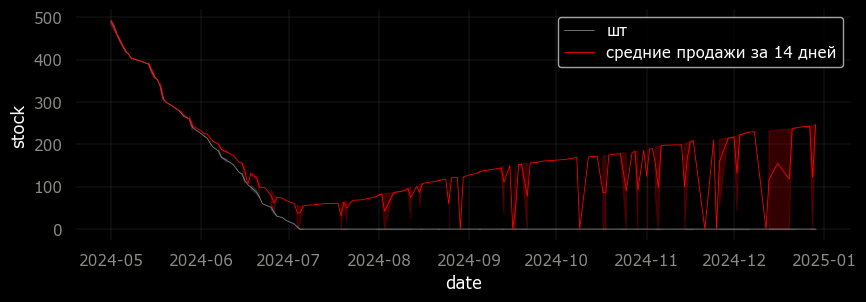

In [274]:
plt.figure(figsize=(10,3))
sns.lineplot(x = df_test.date, y = df_test.stock, color = 'gray', linewidth=0.6, label = 'шт')
sns.lineplot(x = df_t.date, y = df_t.stock, color = 'red', linewidth=0.6, label = 'средние продажи за 14 дней')
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

In [275]:
df_t2 = df_test.copy()

In [278]:
aver = df_test.quantity.mean()
x=4
cnt=0
for index, row in df_t2.iterrows():
    if index > 14:
        if (x*df_t2.at[index,'roll'] > df_t2.at[index,'stock']) and (df_t2.at[index,'quantity'] < aver):
             df_t2.at[index,'price'] = df_t2.at[index,'price']*1.05
             if df_t2.at[index,'quantity'] - 1 > 0:
                df_t2.at[index,'roll'] = df_t2.at[index,'roll'] - 1*cnt
                df_t2.at[index,'quantity'] = df_t2.at[index,'quantity'] - 1
                df_t2.at[index,'stock'] = df_t2.at[index,'stock'] + 1*cnt
                cnt=cnt+1
df_t2[13:20]

,index,datetime,order_id,customer_id,item,price,quantity,discount,bundle_discount,date,stock,roll
13,6060,2024-05-06 11:23:58,2778188,0,item_96,260.3,2,0.0,0.0,2024-05-06,422,78.0
14,12230,2024-05-06 18:57:06,2778194,87466,item_96,260.3,3,0.2,0.0,2024-05-06,419,75.0
15,17181,2024-05-06 18:10:06,2778182,0,item_96,260.3,3,0.0,0.0,2024-05-06,416,76.0
16,12244,2024-05-07 13:06:54,2778199,0,item_96,260.3,3,0.0,0.0,2024-05-07,413,72.0
17,12416,2024-05-08 11:19:34,2778212,74629,item_96,260.3,8,0.2,0.0,2024-05-08,405,78.0
18,13705,2024-05-08 10:16:59,2778213,0,item_96,260.3,4,0.0,0.0,2024-05-08,401,78.0
19,13830,2024-05-11 10:58:07,2778286,0,item_96,260.3,4,0.0,0.0,2024-05-11,397,73.0


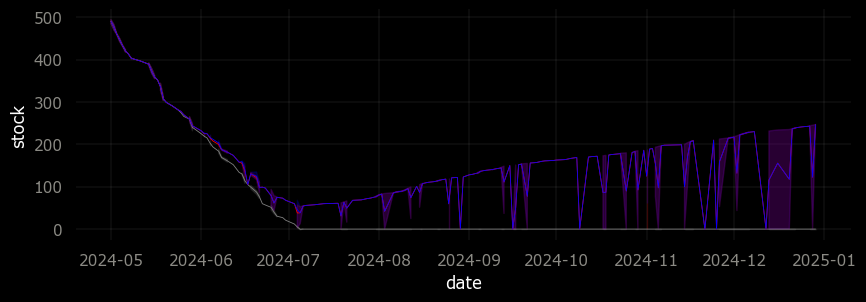

In [279]:
plt.figure(figsize=(10,3))
sns.lineplot(x = df_test.date, y = df_test.stock, color = 'gray', linewidth=0.6)
sns.lineplot(x = df_t.date, y = df_t.stock, color = 'red', linewidth=0.6)
sns.lineplot(x = df_t2.date, y = df_t2.stock, color = 'blue', linewidth=0.6)
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()